## Chapter 7
#### 7.1 : Handling Missing Data
#### 7.2 : Data Transformation
#### 7.3 : String Manipulation

### 7.1 : Handling Missing Data

- Filtering Out Missing Data
> 1. isnull
> 2. notnull
> 3. dropna
- Filling In Missing Data
> 1. fillna


In [1]:
import pandas as pd
import numpy as np

In [2]:
#Filtering Out Missing Data:

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, None])

In [3]:
string_data.isnull()

0    False
1    False
2     True
3     True
dtype: bool

In [4]:
string_data[string_data.isnull()]

2     NaN
3    None
dtype: object

In [5]:
string_data

0     aardvark
1    artichoke
2          NaN
3         None
dtype: object

In [6]:
string_data.notnull()

0     True
1     True
2    False
3    False
dtype: bool

In [7]:
string_data[string_data.notnull()]

0     aardvark
1    artichoke
dtype: object

In [8]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])

In [10]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [9]:
test=data.dropna()

In [10]:
test

0    1.0
2    3.5
4    7.0
dtype: float64

In [14]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [11]:
data.dropna(inplace=True)

In [12]:
data

0    1.0
2    3.5
4    7.0
dtype: float64

In [13]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],[np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

In [14]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [16]:
data.dropna(axis=1)

""
0
1
2
3


In [21]:
data.dropna(axis=0,how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [24]:
#Filling In Missing Data

In [18]:
df = pd.DataFrame(np.random.randn(7, 3))

In [19]:
df.iloc[:4, 1] = np.nan

In [20]:
df.iloc[:2, 2] = np.nan

In [28]:
df

,0,1,2
0,-0.566232,NaN,NaN
1,1.021952,NaN,NaN
2,-0.249356,NaN,-1.659606
3,1.203199,NaN,-0.132810
4,0.319434,0.835406,1.640923
5,-0.848790,0.190217,-0.129441
6,-0.383665,0.358295,0.125626


In [31]:
df.fillna(0)

,0,1,2
0,-0.566232,0.000000,0.000000
1,1.021952,0.000000,0.000000
2,-0.249356,0.000000,-1.659606
3,1.203199,0.000000,-0.132810
4,0.319434,0.835406,1.640923
5,-0.848790,0.190217,-0.129441
6,-0.383665,0.358295,0.125626


In [22]:
df.fillna({1:0.5,2:0.7})

,0,1,2
0,0.182153,0.500000,0.700000
1,-1.207443,0.500000,0.700000
2,-0.562277,0.500000,0.941039
3,-0.186119,0.500000,-0.638740
4,-0.973625,0.184700,0.255749
5,-0.885544,0.615028,-0.253152
6,-0.185171,1.091291,-1.130573



### 7.2 : Data Transformation

- Removing Duplicated
> 1. duplicated
> 2. drop_duplicated
- Transforming Data Using a Function or Mapping
> 1. map
- Replacing Values
> 1. replace
- Renaming Axis Indexes
> 1. rename
- Discretization And Binning
> 1. cut
- Detecting And Filtering Outliers

In [ ]:
# Removing Duplicated

In [23]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],'k2': [1, 1, 1, 3, 3, 4, 4]})

In [24]:
data

,k1,k2
0,one,1
1,two,1
2,one,1
3,two,3
4,one,3
5,two,4
6,two,4


In [25]:
data.duplicated()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
dtype: bool

In [26]:
data[data.duplicated()]

,k1,k2
2,one,1
6,two,4


In [27]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
3,two,3
4,one,3
5,two,4


In [28]:
data['v1'] = range(7)

In [73]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,1,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [29]:
data.duplicated(['k1'])

0    False
1    False
2     True
3     True
4     True
5     True
6     True
dtype: bool

In [30]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [31]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
1,two,1,1
2,one,1,2
3,two,3,3
4,one,3,4
6,two,4,6


In [ ]:
#Transforming Data Using A Function Or Mapping

In [49]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon','Pastrami', 'corned beef', 'Bacon','pastrami', 'honey ham', 'nova lox'],'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [50]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [51]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

In [52]:
lowercased = data['food'].str.lower()

In [53]:
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [54]:
data['animal1'] = lowercased.map(meat_to_animal)

In [55]:
data

,food,ounces,animal1
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [91]:
data['animal']=data['food'].map(lambda x: meat_to_animal[x.lower()]) #one line code

In [92]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [93]:
#Replacing Values

In [94]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [95]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [96]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [97]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [98]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [99]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

# Discretization and Binning

In [56]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [57]:
bins = [18, 25, 35, 60, 100]

In [58]:
cats = pd.cut(ages, bins)

In [59]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [60]:
cats.codes
 

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [61]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [62]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

# Detecting and Filtering Outliers

In [76]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [65]:
data.head(20)

,0,1,2,3
0,0.285622,-0.645005,1.643716,1.576231
1,-0.768326,-0.263216,-0.756150,-0.869610
2,1.717575,-0.358989,-2.025188,-0.077604
3,-0.925411,-0.259664,-0.967772,-0.097464
4,0.280534,-1.949769,-0.432325,0.171565
5,1.097264,0.643354,0.443492,-0.337426
6,1.109347,-0.487235,-1.506082,-0.145446
7,0.220889,0.514605,-1.492464,-1.554698
8,-0.906826,-1.950112,1.314341,-0.936049
9,1.617249,-0.032921,0.612583,0.079270


In [66]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.046532,0.027077,-0.028209,-0.018227
std,1.013335,1.011078,0.974584,0.937816
min,-3.076712,-3.220910,-3.139357,-3.202394
25%,-0.664172,-0.632292,-0.656544,-0.622810
50%,0.067718,0.016959,-0.071903,-0.000360
75%,0.729163,0.685403,0.630963,0.598886
max,3.407198,3.037387,3.582735,3.368112


In [67]:
col = data[1]

In [68]:
col.head(15)

0    -0.645005
1    -0.263216
2    -0.358989
3    -0.259664
4    -1.949769
5     0.643354
6    -0.487235
7     0.514605
8    -1.950112
9    -0.032921
10   -0.798109
11   -1.579900
12    0.171218
13    0.266350
14    0.029052
Name: 1, dtype: float64

In [69]:
col[np.abs(col) > 3]

96     3.013036
165   -3.220910
287    3.037387
Name: 1, dtype: float64

In [73]:
np.sign(data)

,0,1,2,3
0,1.0,-1.0,1.0,1.0
1,-1.0,-1.0,-1.0,-1.0
2,1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,1.0
...,...,...,...,...
995,-1.0,-1.0,1.0,-1.0
996,-1.0,-1.0,-1.0,1.0
997,-1.0,-1.0,1.0,1.0
998,1.0,1.0,-1.0,1.0


In [72]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
93,1.081379,-0.066555,0.898547,-3.202394
96,0.787600,3.013036,-0.845099,-0.007359
165,-0.937662,-3.220910,-0.806533,1.322049
173,-3.076712,1.772046,0.370852,-0.594342
287,0.073635,3.037387,0.899714,0.950160
440,3.407198,-1.782404,-1.256350,-0.681709
629,-1.754462,-0.944203,-3.139357,0.867440
849,-1.212471,0.942426,3.582735,-0.281975
928,1.753991,0.957014,0.154344,3.368112


In [74]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [75]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.046202,0.027248,-0.028653,-0.018393
std,1.011830,1.010242,0.972158,0.935890
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.664172,-0.632292,-0.656544,-0.622810
50%,0.067718,0.016959,-0.071903,-0.000360
75%,0.729163,0.685403,0.630963,0.598886
max,3.000000,3.000000,3.000000,3.000000




### 7.3 : String Manipulation

- Regular Expressions
> 1. regex

In [77]:
#Regular Expressions

In [81]:
import re
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._+-]+@[A-Z0-9.-]+.[A-Z]{2,4}' #text@text.pk

In [82]:
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [83]:
regex

re.compile(r'[A-Z0-9._+-]+@[A-Z0-9.-]+.[A-Z]{2,4}', re.IGNORECASE|re.UNICODE)

In [85]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [ ]:
np.broadcast_arrays()


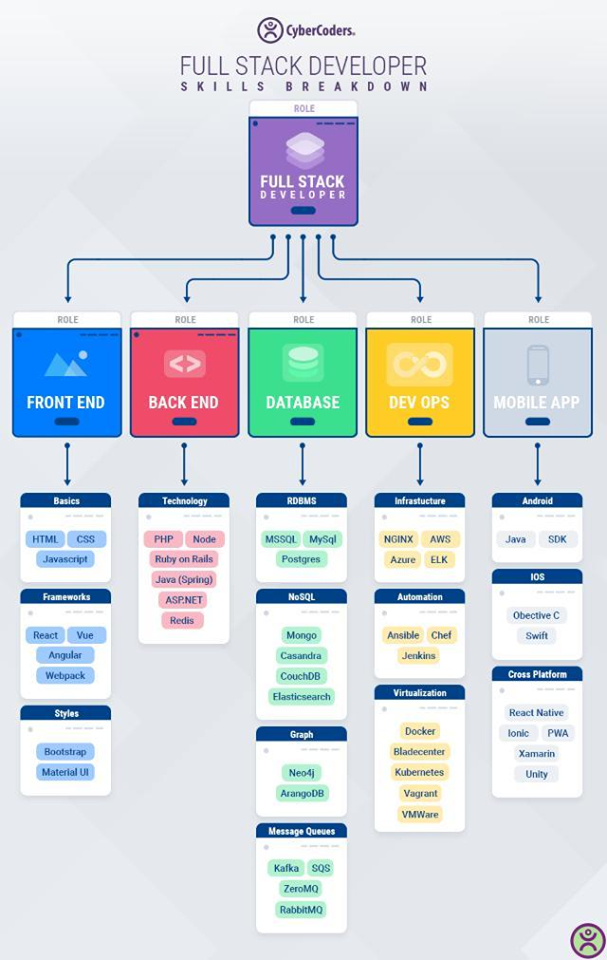

1) Simply create an empty Markdown cell. 2) Then drag-and-drop the image file into the empty Markdown cell. The Markdown code that will insert the image then appears. 3) Then execute the Markdown cell by hitting Shift-Enter.

In [86]:
![Image of Yaktocat](https://octodex.github.com/images/yaktocat.png)

'[Image' is not recognized as an internal or external command,
operable program or batch file.


<img src>